In [131]:
%matplotlib inline
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np

## Task 1: Data transformation

In [132]:
# importing the dataset
df = pd.read_csv("titanic.csv")
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [133]:
# 1 
df["FamilySize"] = df["Parch"] + df["SibSp"] + 1 
print(f"The max size of FamilySize is {df["FamilySize"].max()}")

The max size of FamilySize is 11


In [134]:
# 2
df["FareCategory"] = pd.cut(df["Fare"], bins=[0, 10, 20, 30, 50, df["Fare"].max()])

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,FareCategory
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,"(0.0, 10.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,"(50.0, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,"(0.0, 10.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,"(50.0, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,"(0.0, 10.0]"


In [135]:
print(df["FareCategory"].value_counts())


FareCategory
(0.0, 10.0]        321
(10.0, 20.0]       179
(50.0, 512.329]    160
(20.0, 30.0]       142
(30.0, 50.0]        74
Name: count, dtype: int64


In [136]:
# 3

def extract_Title(x):
    split_name = x.split(',')
    return split_name[1].split(".")[0]


df["Title"] = df["Name"].map(extract_Title)

print(f"There are {df["Title"].nunique()} unquie values")

There are 17 unquie values


## Data Reduction

In [137]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilySize',
       'FareCategory', 'Title'],
      dtype='object')

In [138]:
df.drop(["PassengerId"], axis=1, inplace=True)  # PassengerID does not give any insignht whenter one Survived and is just an index
df.drop(["Name"],  axis=1, inplace=True)         # Name is purely random data (bunch of words) and does not show if someone survived, Title is a better metric since it shows class and importance

print(df["Ticket"].value_counts())
print(df.shape)
df.drop(["Ticket"],  axis=1, inplace=True)             # There are too many unique Tickets to extract any valuable data to identify if someone survived or not. There are 681 unique entries which seem to have no consistency


Ticket
347082              7
1601                7
CA. 2343            7
3101295             6
CA 2144             6
                   ..
PC 17590            1
17463               1
330877              1
373450              1
STON/O2. 3101282    1
Name: count, Length: 681, dtype: int64
(891, 13)


In [139]:
def convertCatergorical_df(df):
    # making a copy of the data
    df_copy = df.copy()

    # converting all the categorical data into Intgers
    for i in df_copy.columns:
        df_copy[i] = LabelEncoder().fit_transform(df_copy[i])
    
    return df_copy


def create_corrleted_df(df, target):

    df_copy = convertCatergorical_df(df)
    matrix = df_copy.corr()   # making a correlation matrix 
    top_5 = matrix.nlargest(6, target).index
    return df[top_5].copy()

In [140]:
df_corr_columns = create_corrleted_df(df, "Survived")

df_corr_columns.head()

,Survived,Fare,FareCategory,Parch,FamilySize,SibSp
0,0,7.2500,"(0.0, 10.0]",0,2,1
1,1,71.2833,"(50.0, 512.329]",0,2,1
2,1,7.9250,"(0.0, 10.0]",0,1,0
3,1,53.1000,"(50.0, 512.329]",0,2,1
4,0,8.0500,"(0.0, 10.0]",0,1,0


<Axes: >

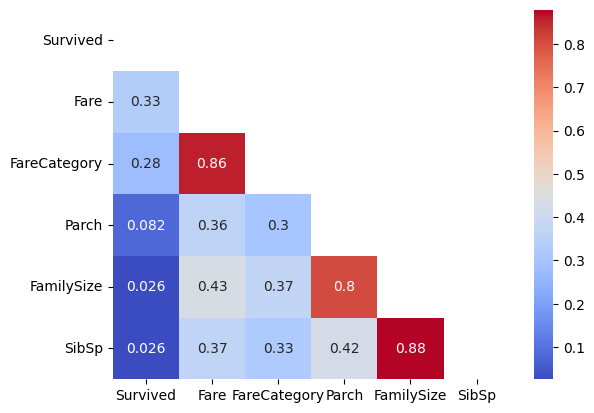

In [143]:
df_heatmap = convertCatergorical_df(df_corr_columns) # to stop FareCategory or any categorial data from giving me issues

corr_df_heatmap = df_heatmap.corr().abs()
mask = np.zeros_like(corr_df_heatmap)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_df_heatmap, annot=True, cmap="coolwarm", mask=mask)